# Monte-Carlo Simulations

## Introduction
Simulating random variables from complex probability distributions is a fundamental task in scientific computing. This project implements two widely used simulation techniques: the **Accept-Reject Method** and the **Markov Chain Monte Carlo** simulation. These methods enable sampling from non-standard or high-dimensional distributions that are challenging to simulate directly.

### Import required Python libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

### Task 1: Accept-Reject Method
We will develop an accept-reject method to simulate the $f(x)$ curve. The given density function is:  
$$f(x) \propto exp(-x^2/2)\{sin(6x)^2 + 3 cos(x)^2 sin(4x)^2 +1\}$$

#### Part (a): Plot $f(x)$ and show that it can be bounded by $M g(x)$, where $g$ is the standard normal density as:
$$g(x) = \frac {exp(-x^2/2)} {\sqrt{2\pi}}$$  
We will try to find an acceptable, if not necessarily optimal, value of $M$ using a built-in Python optimization function **minimize_scalar** from scipy.optimize.

***Task 1(a) output***


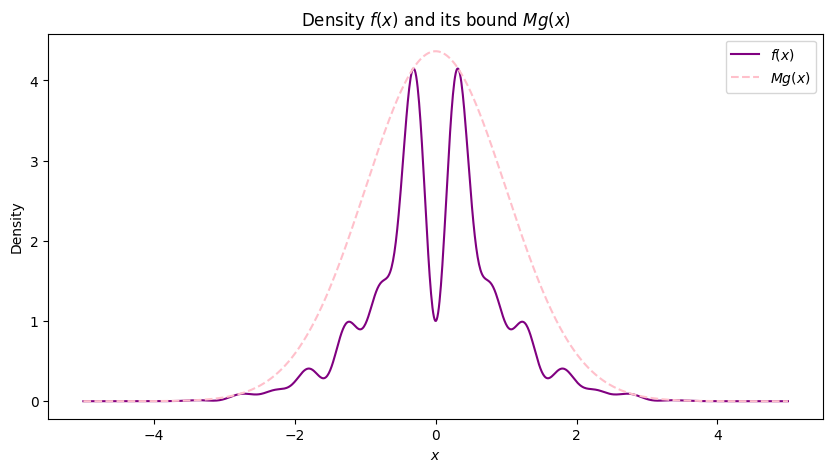

Acceptable value of M = 10.94


In [3]:
# Define functions f(x) and g(x)
def f(x):
    return np.exp(-x**2 / 2) * (np.sin(6 * x)**2 + 3 * np.cos(x)**2 * np.sin(4 * x)**2 + 1)

def g(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Find an acceptable M using minimize_scalar
M = -minimize_scalar(lambda x: -f(x)/g(x), bounds=(-5, 5), method='bounded').fun

# Plot
x_vals = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f(x_vals), label='$f(x)$', color='purple')
plt.plot(x_vals, M * g(x_vals), label='$M g(x)$', linestyle='--', color='pink')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Density $f(x)$ and its bound $M g(x)$')
plt.legend()

print("***Task 1(a) output***")
plt.show()
print(f"Acceptable value of M = {M:.2f}")

#### Comments on Task 1 (a) output:
From the above plot we can see that the bounding constant $M = 10.94$ ensures $f(x) \leq M.g(x)$, where $g(x)$ is the standard normal density. This value is derived by optimization function minimize_scalar from scipy.optimize with bounds $(-5, 5)$. In the given example, the function $f(x)$ is unnormalized and it can be normalized by calculating normalizaion constant ($K$) by using integration and then dividing the function $f(x)$ with it. However, this part is not implemented in this code for simpilicity as the value of $M$ is still acceptable and satisfies the density function $f(x)$ and its bounds $M g(x)$.

#### Part (b): Generate $n = 2500$ random variables from $f$ using the Accept-reject algorithm


***Task 1(b) output***


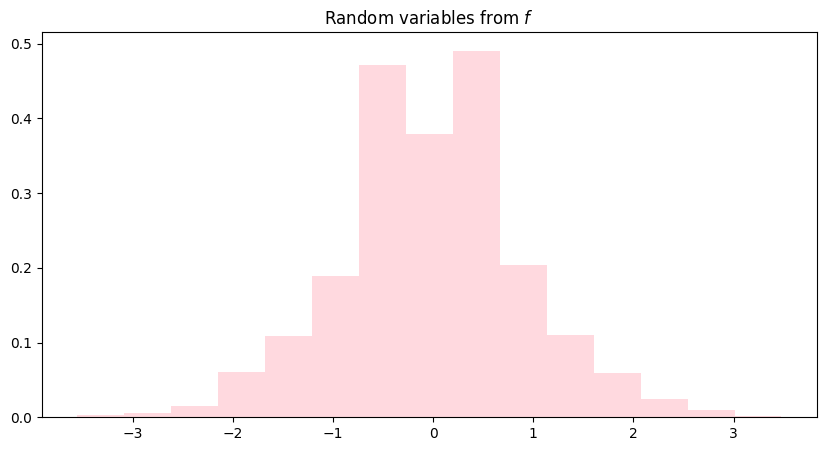

In [4]:
# Accept-Reject from Triangle
def accept_reject(n):
    samples = []
    tries = 0
    while len(samples) < n:
        y = np.random.normal()
        u = np.random.uniform()
        rho = f(y) / (M * g(y))
        if u <= rho:
            samples.append(y)
        tries += 1
    acceptance_rate = len(samples) / tries
    return np.array(samples), acceptance_rate

# Generate 2500 samples
n = 2500
samples, acceptance_rate = accept_reject(n)
x_vals = np.linspace(-5, 5, 1000)

# Plot
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=15, density=True, alpha=0.6, label='Samples', color='pink')
plt.title("Random variables from $f$")

print("***Task 1(b) output***")
plt.show()

#### Comments on Task 1 (b) output:
In above histogram, we have plotted $n = 2500$ random variables from $f$ those were generated using accept-reject algorithm. In the following part, we will compare the generated data with the $f$ density function.

#### Part (c): Plot the histogram of the generated data and compare it with the $f$ density


***Task 1(c) output***


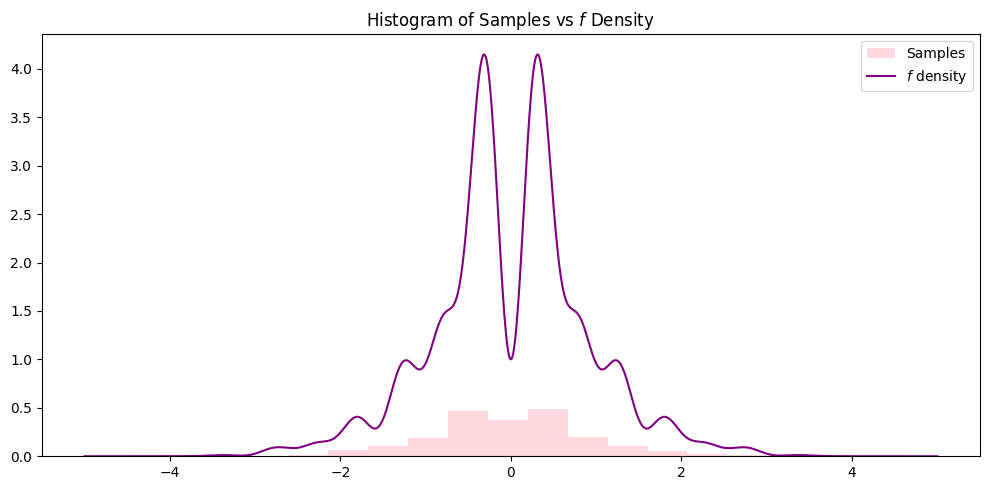

Acceptance rate: 0.5403


In [5]:
# Plot the histogram of the generated data and compare it with f density
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=15, density=True, alpha=0.6, label='Samples', color='pink')
plt.plot(x_vals, f(x_vals), label='$f$ density', color='purple')
plt.title('Histogram of Samples vs $f$ Density')
plt.legend()
plt.tight_layout()

print("***Task 1(c) output***")
plt.show()
print(f"Acceptance rate: {acceptance_rate:.4f}")

#### Comments on Task 1 (c) output:
From the above plot, we can see that the histogram of the generated samples closely aligns with the $f$ density, particularly around $x \in (-3, 3)$. Also, both the histogram and $f$ density decay rapidly beyond $x$ values of $-3$ and $3$, which is consistent with the $exp(-x^2/2)$. So, the generated sample and $f$ density follow the same distribution because the accept-reject algorithm ensures that accepted samples are distributed according to $f$. i.e., $f \leq M g(x)$ for all $x$. Also, the acceptance rate in the accept-reject algorithm is $54.03 \%$, which is significant.

### Task 2: Markov Chain Monte Carlo
We will develop a Markov Chain Monte Carlo to simulate dependent data and estimate the $f(x)$ curve. The given density function is:  
$$f(x) = \frac {1} {\pi (1 + x^2)}, x \in \R$$

#### Part (a): Apply the random walk Metropolis-Hastings method and generate $n = 1000$ observations from the desnity $f(x)$.


In [6]:
def f(x):
    return 1 / (np.pi * (1 + x**2))

In [7]:
def MH_rw(m, x0, B=50, K=1, scale=1):
    x_old = x0
    n = B + 1 + K * (m - 1)
    n_accept = 0
    X = []
    
    for i in range(n):
        x_star = x_old + np.random.normal(scale=scale)
        rho = min(f(x_star) / f(x_old), 1)
        accept = np.random.binomial(n=1, p=rho)
        if accept == 1:
            X.append(x_star)
            x_old = x_star
        else:
            X.append(x_old)
        n_accept += accept
    
    sample = X[B::K]
    accept_rate = n_accept / n
    
    return {'full_chain': X, 'sample': sample, 'accept_rate': accept_rate}

In [8]:
study1 = MH_rw(1000, x0=5, scale=3)

#### Comments on Task 2 (a) output:
In part (a), we have used the same code snippet we wrote in the class and changed the density function $f(x) = \frac {1}{\pi (1 + x^2)}, x \in \R$ as per the given example. Then we executed this function with some parameters, which we will plot in part (d) to do a comparisson between different approaches.

#### Part (b): Apply the standard form of Metropolis-Hastings method using instrumental distribution $g(x)$ and generate $n = 1000$ observations from the desnity $f(x)$.


In [9]:
def g(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

In [10]:
def MH_id(m, x0, B=50, K=1, scale=1):
    x_old = x0
    n = B + 1 + K * (m - 1)
    n_accept = 0
    X = []
    
    for i in range(n):
        x_star = np.random.normal()
        rho = min((f(x_star) * g(x_old)) / (f(x_old) * g(x_star)), 1)
        accept = np.random.binomial(n=1, p=rho)
        if accept == 1:
            X.append(x_star)
            x_old = x_star
        else:
            X.append(x_old)
        n_accept += accept
    
    sample = X[B::K]
    accept_rate = n_accept / n
    
    return {'full_chain': X, 'sample': sample, 'accept_rate': accept_rate}

In [11]:
study2 = MH_id(1000, x0=2)

#### Comments on Task 2 (b) output:
In part (b), we have introduced an instrumental distribution function as $g(x) = \frac {1}{\sqrt {2 \pi}} exp(-x^2/2), x \in \R$ and the probability of accepting the candidate $x^*$ is calculated by:  
$$\rho(x^{(t)}, x^*) = min (\frac {f(x^*)g(x^{(t)})}{f(x^{(t)})g(x^*)}, 1)$$
Then we executed this function with some parameters, which we will plot in part (d) to do a comparisson between different approaches.

#### Part (c): Apply the standard form of Metropolis-Hastings method using uniform distribution (Box-Muller) and generate $n = 1000$ observations from the desnity $f(x)$.


In [12]:
def box_muller(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

In [13]:
def MH_ud(m, x0, B=50, K=1, scale=1):
    x_old = x0
    n = B + 1 + K * (m - 1)
    n_accept = 0
    X = []
    
    for i in range(n):
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)
        z1, z2 = box_muller(u1, u2)
        x_star = z1 if i % 2 == 0 else z2
        rho = min((f(x_star) * g(x_old)) / (f(x_old) * g(x_star)), 1)
        accept = np.random.binomial(n=1, p=rho)
        if accept == 1:
            X.append(x_star)
            x_old = x_star
        else:
            X.append(x_old)
        n_accept += accept
    
    sample = X[B::K]
    accept_rate = n_accept / n
    
    return {'full_chain': X, 'sample': sample, 'accept_rate': accept_rate}

In [14]:
study3 = MH_ud(1000, x0=2)

#### Comments on Task 2 (c) output:
In part (c), we have introduced Box-Muller transofmation and the function box_muller takes two input parameters as $U_1$ and $U_2$ and returns $Z_1$ and $Z_2$. Then we chose $U_1$ and $U_2$ as independent samples on the unit interval $(0, 1)$, and we pass these $U_1$ and $U_2$ to the box_muller function which computes $Z_1$ and $Z_2$ as $Z_1 = \sqrt {-2 ln U_1 cos(2 \pi U_2)}$ and $Z_2 = \sqrt {-2 ln U_1 sin (2 \pi U_2)}$. The results of this function call ($Z_1$ and $Z_2$) are independent and we can use either of these in $\rho$ calculation. However, in our code implementation, we computed the modulus 2 of the loop counter and used an alternate between $Z_1$ and $Z_2$ throughout iterations. Then we executed this function with some parameters, which we will plot in part (d) to do a comparisson between different approaches.

#### Part (d): Plot the histograms of full chains, accepted chains and trace plots for part a-c and compare.


***Task 2(d) output***


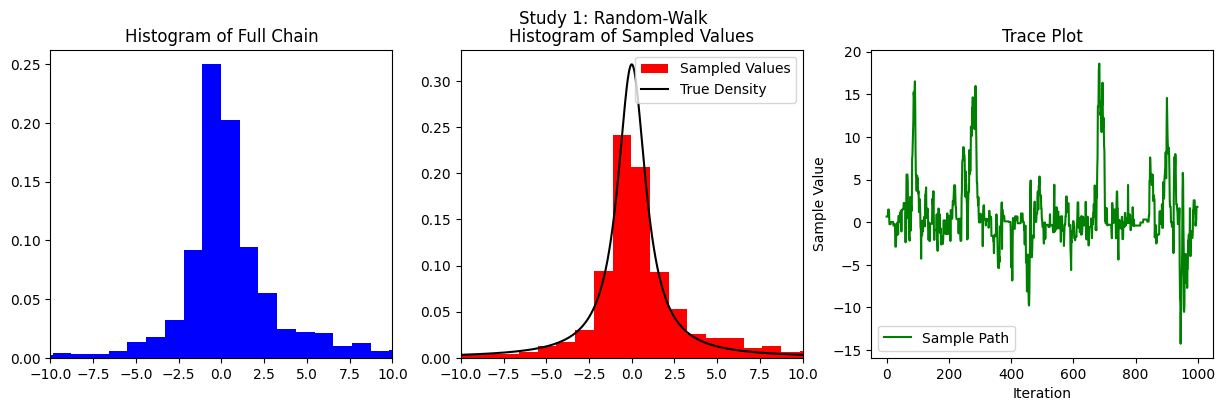

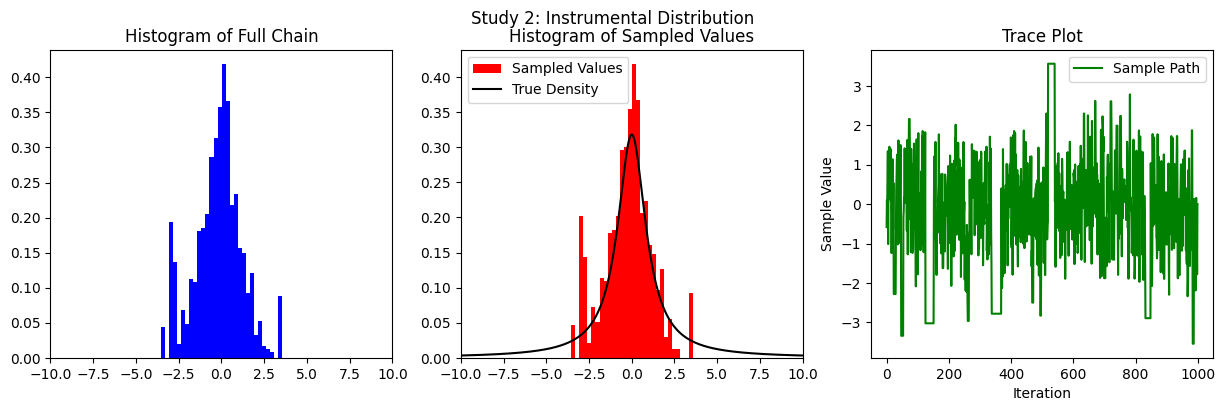

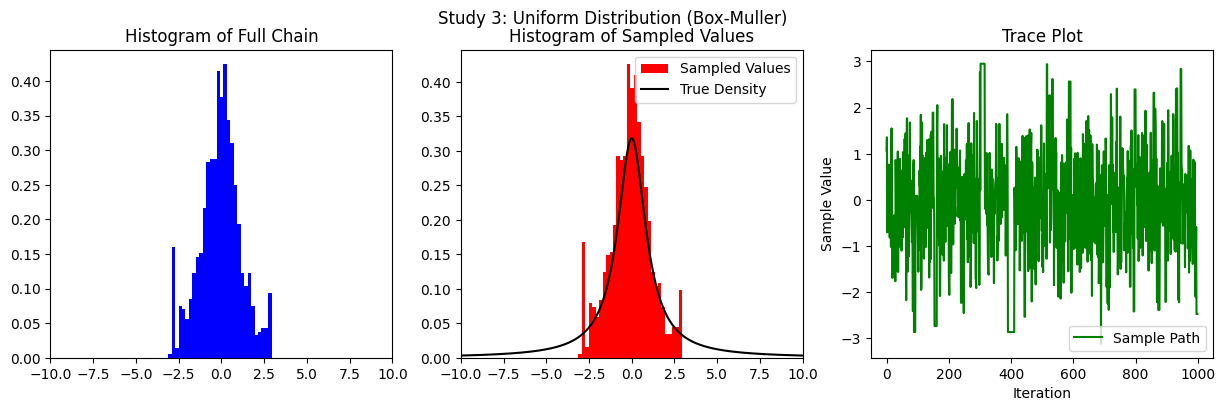

Acceptance Rates:
Random-Walk: 0.5295
Instrumental Distribution: 0.8210
Uniform Distribution (Box-Muller): 0.8790


In [15]:
print("***Task 2(d) output***")
x_vals = np.linspace(-10, 10, 1000)

fig1, axes1 = plt.subplots(1, 3, figsize=(15, 4))
fig1.suptitle('Study 1: Random-Walk')
axes1[0].hist(study1['full_chain'], bins=30, density=True, color='b', label='Full Chain')
axes1[0].set_xlim(-10, 10)
axes1[0].set_title("Histogram of Full Chain")

axes1[1].hist(study1['sample'], bins=30, density=True,  color='r', label='Sampled Values')
axes1[1].plot(x_vals, f(x_vals), 'k-', label='True Density')
axes1[1].set_xlim(-10, 10)
axes1[1].set_title("Histogram of Sampled Values")
axes1[1].legend()

axes1[2].plot(range(len(study1['sample'])), study1['sample'], 'g-', label='Sample Path')
axes1[2].set_title("Trace Plot")
axes1[2].set_xlabel("Iteration")
axes1[2].set_ylabel("Sample Value")
axes1[2].legend()

fig2, axes2 = plt.subplots(1, 3, figsize=(15, 4))
fig2.suptitle('Study 2: Instrumental Distribution')
axes2[0].hist(study2['full_chain'], bins=30, density=True, color='b', label='Full Chain')
axes2[0].set_xlim(-10, 10)
axes2[0].set_title("Histogram of Full Chain")

axes2[1].hist(study2['sample'], bins=30, density=True,  color='r', label='Sampled Values')
axes2[1].plot(x_vals, f(x_vals), 'k-', label='True Density')
axes2[1].set_xlim(-10, 10)
axes2[1].set_title("Histogram of Sampled Values")
axes2[1].legend()

axes2[2].plot(range(len(study2['sample'])), study2['sample'], 'g-', label='Sample Path')
axes2[2].set_title("Trace Plot")
axes2[2].set_xlabel("Iteration")
axes2[2].set_ylabel("Sample Value")
axes2[2].legend()

fig3, axes3 = plt.subplots(1, 3, figsize=(15, 4))
fig3.suptitle('Study 3: Uniform Distribution (Box-Muller)')
axes3[0].hist(study3['full_chain'], bins=30, density=True, color='b', label='Full Chain')
axes3[0].set_xlim(-10, 10)
axes3[0].set_title("Histogram of Full Chain")

axes3[1].hist(study3['sample'], bins=30, density=True,  color='r', label='Sampled Values')
x_vals = np.linspace(-10, 10, 1000)
axes3[1].plot(x_vals, f(x_vals), 'k-', label='True Density')
axes3[1].set_xlim(-10, 10)
axes3[1].set_title("Histogram of Sampled Values")
axes3[1].legend()

axes3[2].plot(range(len(study3['sample'])), study3['sample'], 'g-', label='Sample Path')
axes3[2].set_title("Trace Plot")
axes3[2].set_xlabel("Iteration")
axes3[2].set_ylabel("Sample Value")
axes3[2].legend()

plt.show()

# Print acceptance rates
print("Acceptance Rates:")
print(f"Random-Walk: {study1['accept_rate']:.4f}")
print(f"Instrumental Distribution: {study2['accept_rate']:.4f}")
print(f"Uniform Distribution (Box-Muller): {study3['accept_rate']:.4f}")

#### Comments on Task 2 (d) output:
From the above plots, we can observe that the Random-Walk method has a low acceptance rate but the accuracy of histogram is high and the tail exploration is also good. In contrast to Random-Walk, Instrumental and Box-Muller have very high acceptance rates and the tail exploration is poor and the accuracy of the histogram is also not that high. However, the results keep changing on each trial and parameters of these approaches have to be tuned to get a better output.

#### Running Multiple Trials and Comparing:
In the following code we will try to run this code in 10 trials and calculate some metrics like Effective Sample Size to decide which approach is better.

In [16]:
def compute_ess(samples, max_lag=100):
    n = len(samples)
    if n <= 1:
        return 0
    mean = np.mean(samples)
    var = np.var(samples)
    if var == 0:
        return 0
    
    autocov = [1.0]
    for k in range(1, max_lag + 1):
        if k >= n:
            break
        cov = np.mean((samples[k:] - mean) * (samples[:-k] - mean))
        autocorr = cov / var
        autocov.append(autocorr)
    
    for i in range(1, len(autocov)):
        if autocov[i] < 0:
            autocov = autocov[:i]
            break
    
    ess = n / (1 + 2 * np.sum(autocov[1:]))
    return max(ess, 1)

In [17]:
def compare_methods(n_trials=10, n_samples=1000, burn_in=100):
    methods = {
        "Random-Walk": MH_rw,
        "Instrumental": MH_id,
        "Box-Muller": MH_ud
    }
    
    metrics = {}
    for method_name, method_func in methods.items():
        accept_rates = []
        tail_coverages = []
        ess_list = []
        best_ess = -np.inf
        best_samples = None
        best_accept_rate = 0
        best_tail_coverage = 0
        
        for _ in range(n_trials):
            # Generate samples
            result = method_func(n_samples, x0=2, B=burn_in, scale=6)
            samples = result['sample']
            accept_rate = result['accept_rate']
            
            tail = np.mean(np.abs(samples) > 3)
            ess = compute_ess(samples)

            accept_rates.append(accept_rate)
            tail_coverages.append(tail)
            ess_list.append(ess)
            
            # Track best trial (based on best ESS)
            if ess > best_ess:
                best_ess = ess
                best_samples = samples
                best_accept_rate = accept_rate
                best_tail_coverage = tail
        
        # Plot best trial
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        plt.hist(best_samples, bins=15, density=True, alpha=0.6)
        x = np.linspace(-10, 10, 1000)
        plt.plot(x, f(x), 'k--', label='True Density f(x)')
        plt.title(f"{method_name}: Histogram (Best ESS = {best_ess:.1f})")
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(best_samples[:200], 'g-', alpha=0.6)
        plt.title(f"{method_name}: Trace Plot (Accept Rate = {best_accept_rate:.2f})")
        plt.show()
        
        metrics[method_name] = {
            'avg_accept_rate': np.mean(accept_rates),
            'avg_tail_coverage': np.mean(tail_coverages) * 100,
            'avg_ess': np.mean(ess_list),
            'best_ess': best_ess,
            'best_accept_rate': best_accept_rate,
            'best_tail_coverage': best_tail_coverage * 100
        }
    
    return metrics

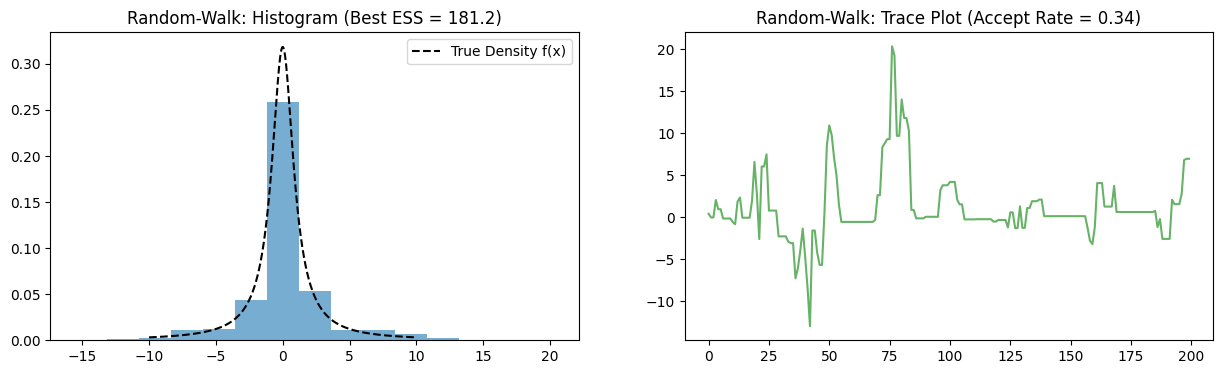

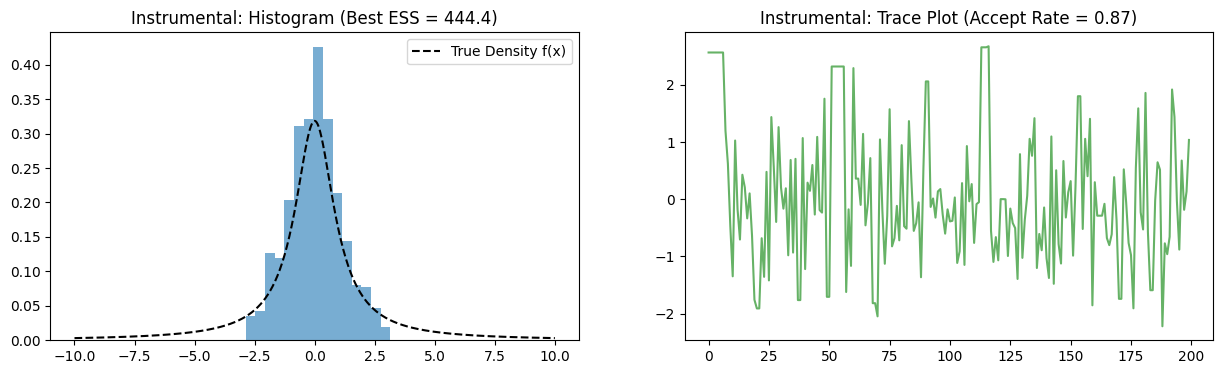

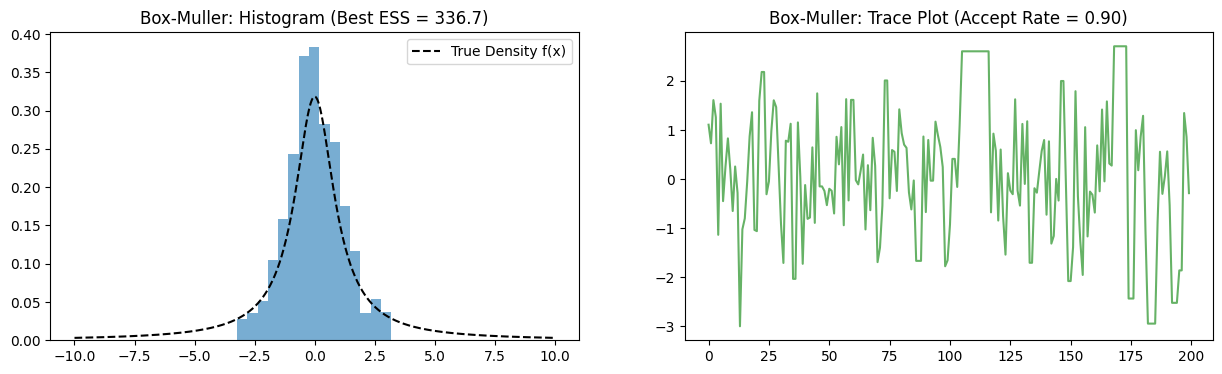

Method          | Best ESS | Best Accept Rate | Best Tail Coverage (%) | Avg ESS
--------------------------------------------------------------------------------
Random-Walk     |   181.2 |             0.34 |                17.8% |   87.7
Instrumental    |   444.4 |             0.87 |                 0.8% |  215.3
Box-Muller      |   336.7 |             0.90 |                 0.9% |  167.1


In [19]:
results = compare_methods(n_trials=10, n_samples=1000, burn_in=100)

print("Method          | Best ESS | Best Accept Rate | Best Tail Coverage (%) | Avg ESS")
print("--------------------------------------------------------------------------------")
for method, data in results.items():
    print(f"{method:15} | {data['best_ess']:>7.1f} | {data['best_accept_rate']:>16.2f} | {data['best_tail_coverage']:>19.1f}% | {data['avg_ess']:>6.1f}")

### Task 2: Conclusion
In above code, we executed 10 trials with a burn_in value of 100 which will skip the initial 100 samples. After that, we calculated the Effective Sample Size (ESS) for each trial and chose the trial based on best ESS value and plotted it. We also calculated the average values of ESS.  

From the above plots, we can see that the histogram for Box-Muller method aligns more closely to the given desnity function in contrast to other methods. In the trace plot for last 200 samples, we can see that Random-Walk is hitting the tail values but most of the time it is staying in the center which means that it is not converging effectively as compared to Instrumental and Box-Muller.  

Other than plots, we have printed some metrics which we can compare. Firstly, we have Best ESS which indicates the Effective Sample Size for the best trial. From the printed output, we can see that the Best ESS value is for Random-Walk is the lowest and Instrumental has a significantly higher Best ESS value. While Box-Muller has a balanced Best ESS value. Best Accept Rate for Random-Walk is the lowest but optimal while for Instrumental and Box-Muller method it is very high. If we have to chose the best method based on Accept Rate, Random-Walk should be the best method as it has the most optimal acceptance rate. If we compare the Best Tail Coverage, Random-Walk has the best tail coverage while Instrumental and Box-Muller have poor tail coverage. Avg ESS for Random Walk is the lowest and Instrumental has the highest Avg ESS.  

After comparing all of these metrices, there are some scenraios where Random-Walk looks like the best method while for other metrics the Instrumental method looks the best. However, Box-Muller lies between these two methods and is more consistent and reliable as compared to other two methods. The method values might change from trial to trial but Box-Muller method seems the most optimal for the given density function. Hence, based on my trials and results, I will suggest Box-Muller over other two methods for this specific problem statement.

## References
1. **Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B.** (2013) *Bayesian Data Analysis* (3rd ed.). Chapman and Hall/CRC.